In [46]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.autograd import Variable
import os
import math

              goog     ibm    aapl
2015-01-02  524.81  145.54  103.50
2015-01-05  513.87  143.24  100.58
2015-01-06  501.96  140.14  100.59
2015-01-07  501.10  139.23  102.01
2015-01-08  502.68  142.26  105.93
...            ...     ...     ...
2016-12-26     NaN     NaN     NaN
2016-12-27  791.55  160.90  115.41
2016-12-28  785.05  159.98  114.92
2016-12-29  782.79  160.38  114.89
2016-12-30  771.82  159.79  113.99

[521 rows x 3 columns]


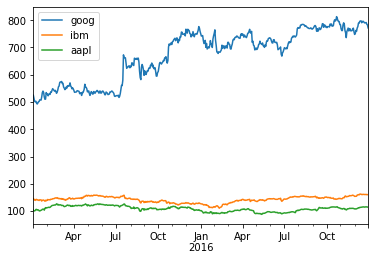

In [16]:
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("data/Data/Stocks/{}.us.txt".format(symbol), index_col='Date',parse_dates=True,usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close':symbol})
        df = df.join(df_temp)
    return df
dates = pd.date_range('2015-01-02','2016-12-31', freq='B')
symbols = ['goog','ibm','aapl']
df = stocks_data(symbols, dates)
df.fillna(method='pad')
print(df)

df.interpolate().plot()
plt.show()

In [17]:
df.head()

goog     ibm    aapl
2015-01-02  524.81  145.54  103.50
2015-01-05  513.87  143.24  100.58
2015-01-06  501.96  140.14  100.59
2015-01-07  501.10  139.23  102.01
2015-01-08  502.68  142.26  105.93

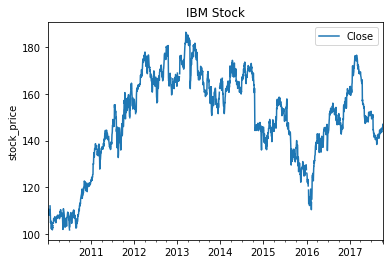

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2010-01-04 to 2017-10-11
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1958 non-null   float64
dtypes: float64(1)
memory usage: 96.2 KB


In [18]:
dates = pd.date_range('2010-01-02','2017-10-11',freq = 'B')
df1 = pd.DataFrame(index=dates)
df_ibm=pd.read_csv("data/Data/Stocks/ibm.us.txt",parse_dates=True, index_col=0)
df_ibm=df1.join(df_ibm)
df_ibm[['Close']].plot()
plt.ylabel("stock_price")
plt.title("IBM Stock")
plt.show()
df_ibm = df_ibm[['Close']]
df_ibm.info()

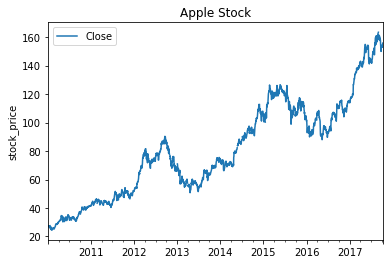

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2010-01-04 to 2017-10-11
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1958 non-null   float64
dtypes: float64(1)
memory usage: 96.2 KB


In [19]:
dates = pd.date_range('2010-01-02','2017-10-11',freq = 'B')
df1 = pd.DataFrame(index=dates)
df_aapl=pd.read_csv("data/Data/Stocks/aapl.us.txt",parse_dates=True, index_col=0)

df_aapl=df1.join(df_aapl)
df_aapl[['Close']].plot()
plt.ylabel("stock_price")
plt.title("Apple Stock")
plt.show()
df_aapl = df_aapl[['Close']]
df_aapl.info()

In [20]:
df_ibm = df_ibm.fillna(method='ffill')
df_aapl = df_aapl.fillna(method='ffill')

scaler_1 = MinMaxScaler(feature_range=(-1,1))
df_ibm['Close'] = scaler_1.fit_transform(df_ibm['Close'].values.reshape(-1,1))

scaler_2 = MinMaxScaler(feature_range=(-1,1))
df_aapl['Close'] = scaler_2.fit_transform(df_aapl['Close'].values.reshape(-1,1))

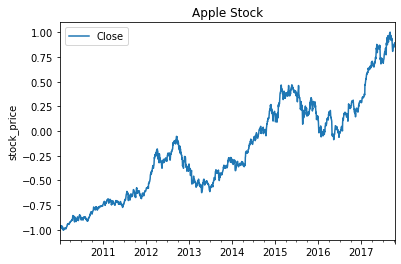

In [21]:
df_aapl=df1.join(df_aapl)
df_aapl[['Close']].plot()
plt.ylabel("stock_price")
plt.title("Apple Stock")
plt.show()

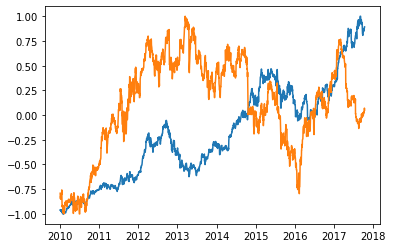

In [22]:
plt.plot(df_aapl['Close'])
plt.plot(df_ibm['Close'])
plt.show()

In [23]:
df_aapl

Close
2010-01-04 -0.959501
2010-01-05 -0.958809
2010-01-06 -0.965103
2010-01-07 -0.965809
2010-01-08 -0.963231
...              ...
2017-10-05  0.875708
2017-10-06  0.874411
2017-10-09  0.882189
2017-10-10  0.883053
2017-10-11  0.892414

[2028 rows x 1 columns]

In [24]:
def load_data_2(stock_1,stock_2,look_back):
    data_raw_1 = stock_1.values
    data_raw_2 = stock_2.values
    data_useful = []
    
    for index in range(len(data_raw_1) - look_back - 21):
        
        data_1 = []
        data_1.append(data_raw_1[index])
        data_1.append(data_raw_1[index+7])
        data_1.append(data_raw_1[index+14])
        data_1.extend(data_raw_1[index+20: index+21+look_back])
        
        data_2 = []
        data_2.append(data_raw_2[index])
        data_2.append(data_raw_2[index+7])
        data_2.append(data_raw_2[index+14])
        data_2.extend(data_raw_2[index+20: index+21+look_back])
        
        data_1 = np.array(data_1)
        data_1.reshape(-1,1)
        data_2 = np.array(data_2)
        data_2.reshape(-1,1)
        
        data_3 = np.hstack((data_1,data_2))
        data_useful.append(data_3)
        if index == -1:
            print(type(data_raw_1[index:index + look_back]))
            print(data_raw_1[index:index + look_back].shape)
    data_useful = np.array(data_useful)
    
    test_set_size = int( np.round(0.3 * data_useful.shape[0]))
    train_set_size = data_useful.shape[0] - test_set_size
    
    x_train_useful = data_useful[:train_set_size,:-1,:]
    y_train_useful = data_useful[:train_set_size,-1,:]
    
    x_test_useful = data_useful[:train_set_size,:-1,:]
    y_test_useful = data_useful[:train_set_size,-1,:]
    
    return [x_train_useful,y_train_useful, x_test_useful, y_test_useful]

In [25]:
look_back = 10
x_train_useful, y_train_useful, x_test_useful, y_test_useful = load_data_2(df_aapl,df_ibm, look_back)

print(f"x_train_useful.shape = {x_train_useful.shape}")
print("y_train_useful.shape =", y_train_useful.shape)
print("x_test_useful.shape =", x_test_useful.shape)
print("y_test_useful.shape =", y_test_useful.shape)

x_train_useful.shape = (1398, 13, 2)
y_train_useful.shape = (1398, 2)
x_test_useful.shape = (1398, 13, 2)
y_test_useful.shape = (1398, 2)


In [26]:
x_train_useful = torch.from_numpy(x_train_useful).type(torch.Tensor)
x_test_useful = torch.from_numpy(x_test_useful).type(torch.Tensor)
y_train_useful = torch.from_numpy(y_train_useful).type(torch.Tensor)
y_test_useful = torch.from_numpy(y_test_useful).type(torch.Tensor)

print(x_train_useful.size(), y_train_useful.size())

n_steps = look_back-1
batch_size = 1606
num_epochs = 350

torch.Size([1398, 13, 2]) torch.Size([1398, 2])


%% Model Structure

In [31]:
input_dim = 2
hidden_dim = 32
num_layers = 2
output_dim = 2

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim,num_layers,batch_first=True) 
        #batch_first True creates input and output tensor of shape (batch_dim,seq_dim, feature_dim)
        self.dropout = nn.Dropout(0.3)
        self.dc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        #initializing hidden states with 0
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        #Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        #Detaching the backward propagation through time in order to stop gradient from propagating through other batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out)
        #Index the hidden state of last time step
        out = self.dc(out[:, -1, :])
        
        return out
    
model = LSTM(input_dim= input_dim, hidden_dim= hidden_dim, output_dim = output_dim, num_layers = num_layers)
    
loss_fn = torch.nn.MSELoss(size_average=True)
    
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(2, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (dc): Linear(in_features=32, out_features=2, bias=True)
)
10
torch.Size([128, 2])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([2, 32])
torch.Size([2])


/home/dheeraj/anaconda3/envs/Coding/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [32]:
input_dim = 2
hidden_dim = 32
num_layers = 2
output_dim = 2
num_epochs = 100
hist = np.zeros(num_epochs)

seq_dim = look_back -1
model.train()
for t in range(num_epochs):
    y_train_pred = model(x_train_useful)
    loss = loss_fn(y_train_pred,y_train_useful)
    
    print(loss)
    if t% 10 == 0 and t != 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    

tensor(0.4294, grad_fn=<MseLossBackward0>)
tensor(0.3136, grad_fn=<MseLossBackward0>)
tensor(0.2343, grad_fn=<MseLossBackward0>)
tensor(0.1850, grad_fn=<MseLossBackward0>)
tensor(0.2070, grad_fn=<MseLossBackward0>)
tensor(0.1812, grad_fn=<MseLossBackward0>)
tensor(0.1426, grad_fn=<MseLossBackward0>)
tensor(0.1163, grad_fn=<MseLossBackward0>)
tensor(0.0869, grad_fn=<MseLossBackward0>)
tensor(0.0636, grad_fn=<MseLossBackward0>)
tensor(0.0666, grad_fn=<MseLossBackward0>)
Epoch  10 MSE:  0.06664600968360901
tensor(0.0804, grad_fn=<MseLossBackward0>)
tensor(0.0854, grad_fn=<MseLossBackward0>)
tensor(0.0694, grad_fn=<MseLossBackward0>)
tensor(0.0557, grad_fn=<MseLossBackward0>)
tensor(0.0485, grad_fn=<MseLossBackward0>)
tensor(0.0485, grad_fn=<MseLossBackward0>)
tensor(0.0516, grad_fn=<MseLossBackward0>)
tensor(0.0513, grad_fn=<MseLossBackward0>)
tensor(0.0506, grad_fn=<MseLossBackward0>)
tensor(0.0461, grad_fn=<MseLossBackward0>)
Epoch  20 MSE:  0.04614491015672684
tensor(0.0434, grad_fn=<M

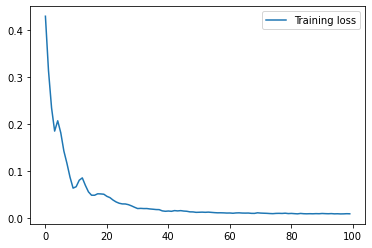

In [33]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [35]:
model.train(False)

LSTM(
  (lstm): LSTM(2, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (dc): Linear(in_features=32, out_features=2, bias=True)
)

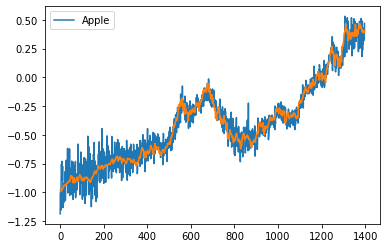

In [36]:
plt.plot(y_train_pred.detach().numpy()[:,0], label = "Apple")
plt.plot(y_train_useful.detach().numpy()[:,0])
plt.legend()
plt.show()

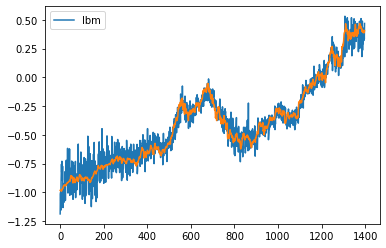

In [37]:
plt.plot(y_train_pred.detach().numpy()[:,0], label = "Ibm")
plt.plot(y_train_useful.detach().numpy()[:,0])
plt.legend()
plt.show()

In [41]:
x_train_pred = model(x_train_useful)
x_test_pred = model(x_test_useful)

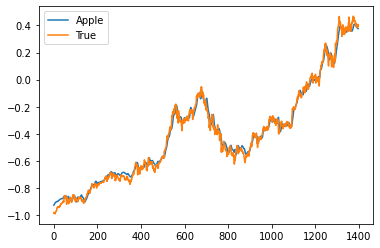

In [42]:
plt.plot(y_test_pred.detach().numpy()[:,0], label="Apple")
plt.plot(y_test_useful.detach().numpy()[:,0] , label="True")
plt.legend()
plt.show()

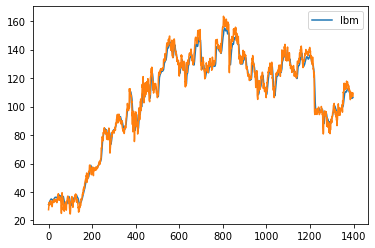

In [43]:
plt.plot(scaler_2.inverse_transform(x_test_pred.detach().numpy()[:,1].reshape(-1, 1)), label="Ibm")
plt.plot(scaler_2.inverse_transform(y_test_useful.detach().numpy()[:,1].reshape(-1, 1)))
plt.legend()
plt.show()